<a href="https://colab.research.google.com/github/yapanits111/hepaClassifierSVM/blob/main/hepaSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ID  target  age  gender steroid  antivirals fatigue malaise anorexia  \
0   1       2   30       2       1           2       2       2        2   
1   2       2   50       1       1           2       1       2        2   
2   3       2   78       1       2           2       1       2        2   
3   4       2   31       1       ?           1       2       2        2   
4   5       2   34       1       2           2       2       2        2   

  liverBig  ... spleen spiders ascites varices bili  alk sgot albu protime  \
0        1  ...      2       2       2       2    1   85   18    4       ?   
1        1  ...      2       2       2       2  0.9  135   42  3.5       ?   
2        2  ...      2       2       2       2  0.7   96   32    4       ?   
3        2  ...      2       2       2       2  0.7   46   52    4      80   
4        2  ...      2       2       2       2    1    ?  200    4       ?   

  histology  
0         1  
1         1  
2         1  
3         1  
4         

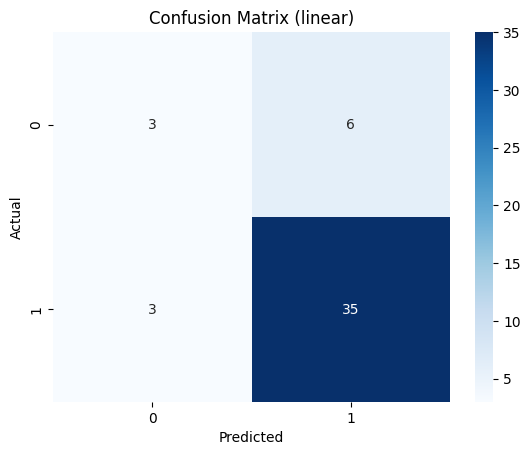


SVM with rbf kernel
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score    support
1              0.400000  0.222222  0.285714   9.000000
2              0.833333  0.921053  0.875000  38.000000
accuracy       0.787234  0.787234  0.787234   0.787234
macro avg      0.616667  0.571637  0.580357  47.000000
weighted avg   0.750355  0.787234  0.762158  47.000000


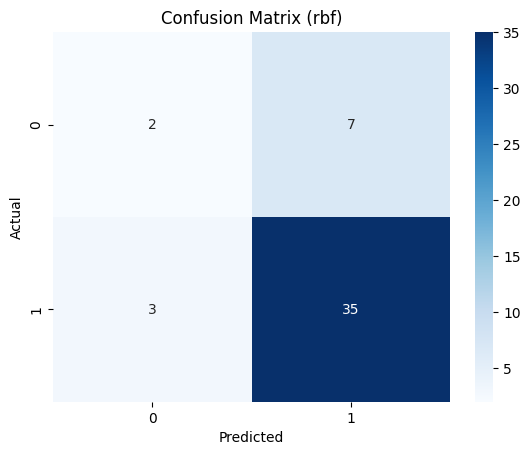


SVM with poly kernel
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score    support
1              1.000000  0.222222  0.363636   9.000000
2              0.844444  1.000000  0.915663  38.000000
accuracy       0.851064  0.851064  0.851064   0.851064
macro avg      0.922222  0.611111  0.639650  47.000000
weighted avg   0.874232  0.851064  0.809955  47.000000


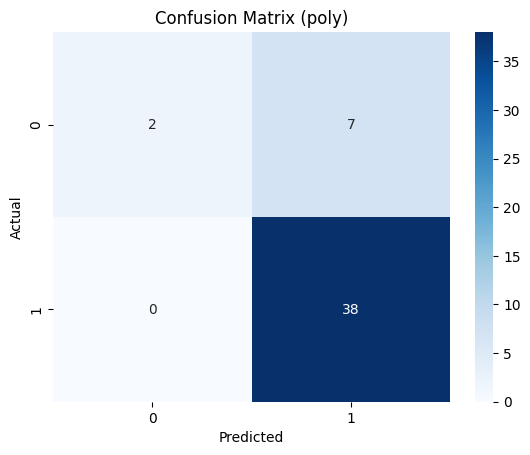

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv('/hepatitis.csv')

# Show head of data
print(df.head())
print("\nMissing values:\n", df.isnull().sum())

# Replace missing values and encode 'yes/no' and 'M/F'
df.replace('?', np.nan, inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Encode categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Features and Target - dropping ID since it does not have value
X = df.drop(['ID', 'target'], axis=1)
y = df['target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and Train SVM Models
kernels = ['linear', 'rbf', 'poly']
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[kernel] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred, output_dict=True),
        'confusion': confusion_matrix(y_test, y_pred)
    }

# Display Results
for kernel in kernels:
    print(f"\nSVM with {kernel} kernel")
    print(f"Accuracy: {results[kernel]['accuracy']:.2f}")
    print("Classification Report:")
    print(pd.DataFrame(results[kernel]['report']).transpose())

    sns.heatmap(results[kernel]['confusion'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix ({kernel})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
